In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/Users/devika/Desktop/IronHack/LabProbability/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")

# Drop rows with missing category values
df.dropna(subset=['category'], inplace=True)

# Generate frequency table
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Frequency']

# Show Top 5 Categories
top_5_categories = category_counts.head(5)
print(top_5_categories)


                                 Category  Frequency
0                       Sports & Outdoors     836265
1                                  Beauty      19312
2  Handmade Clothing, Shoes & Accessories      19229
3                             Bath & Body      19092
4                          Birthday Gifts      18978


In [21]:
# Drop rows with missing price
df = df.dropna(subset=['price'])

# Calculate central tendency
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode().iloc[0]

print(f"Mean Price: £{mean_price:.2f}")
print(f"Median Price: £{median_price:.2f}")
print(f"Mode Price: £{mode_price:.2f}")


Mean Price: £89.24
Median Price: £19.09
Mode Price: £9.99


In [23]:
# Calculate dispersion statistics
variance = df['price'].var()
std_dev = df['price'].std()
price_range = df['price'].max() - df['price'].min()
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

print(f"Variance: {variance:.2f}")
print(f"Standard Deviation: {std_dev:.2f}")
print(f"Range: £{price_range:.2f}")
print(f"IQR (Interquartile Range): £{iqr:.2f}")

Variance: 119445.49
Standard Deviation: 345.61
Range: £100000.00
IQR (Interquartile Range): £36.00


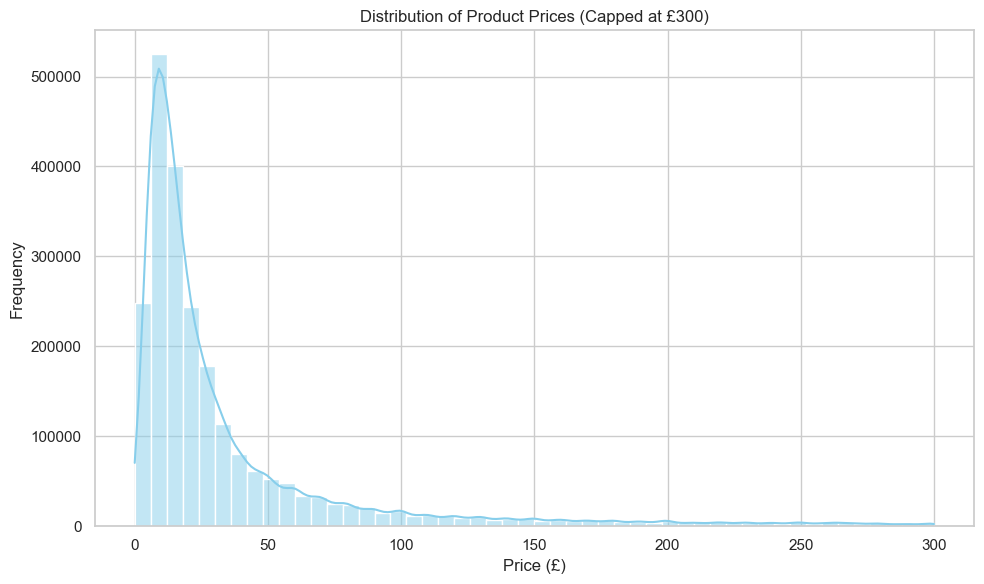

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit histogram to better display dense data
plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] <= 300]['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Product Prices (Capped at £300)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isbestseller', 'boughtinlastmonth', 'category']
**Measures of Centrality**
Mean: 2.15
Median: 0.00
Mode: 0.0

**Measures of Dispersion**
Variance: 4.82
Standard Deviation: 2.19
IQR: 4.40

**Shape of the Distribution**
Skewness: 0.08
Kurtosis: -1.93


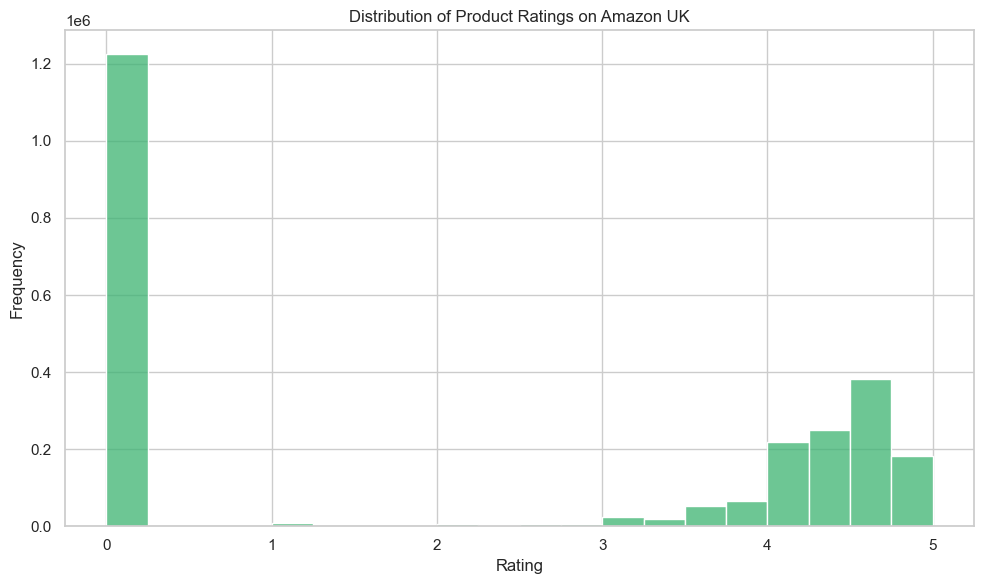

In [37]:
# View all column names
print(df.columns.tolist())

# Example: If the actual column is 'stars'
rating_col = 'stars'  # <-- change this to the actual column name

# Then continue with the analysis
df = df.dropna(subset=[rating_col])

# Centrality
mean_rating = df[rating_col].mean()
median_rating = df[rating_col].median()
mode_rating = df[rating_col].mode().iloc[0]

print("**Measures of Centrality**")
print(f"Mean: {mean_rating:.2f}")
print(f"Median: {median_rating:.2f}")
print(f"Mode: {mode_rating}")

# Dispersion
variance_rating = df[rating_col].var()
std_rating = df[rating_col].std()
iqr_rating = df[rating_col].quantile(0.75) - df[rating_col].quantile(0.25)

print("\n**Measures of Dispersion**")
print(f"Variance: {variance_rating:.2f}")
print(f"Standard Deviation: {std_rating:.2f}")
print(f"IQR: {iqr_rating:.2f}")

# Distribution Shape
from scipy.stats import skew, kurtosis
skewness = skew(df[rating_col])
kurt = kurtosis(df[rating_col])

print("\n**Shape of the Distribution**")
print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurt:.2f}")

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df[rating_col], bins=20, kde=False, color='mediumseagreen')
plt.title('Distribution of Product Ratings on Amazon UK')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
